<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Examples.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Examples: Recommender systems: Content-based filtering
© ExploreAI Academy

In this notebook, we will explore the fundamentals of recommendation systems, focusing specifically on content-based filtering techniques. We will delve into the workings of content-based filtering, a method that recommends items similar to those a user has liked or interacted with in the past.

## Learning Objectives

By the end of this notebook, you should be able to:
- Understand the purpose and basic operation of a recommender system
- Understand the role of similarity metrics utilised in recommender algorithms
- Assess the performance of a recommender system
- Implement a simple content-based filtering algorithm

## Outline

This notebook is structured as follows:
- The importance of making recommendations;
- Measuring similarity; 
- Assessing the performance of a recommender system; 
- The intuition behind content-based filtering; and 
- Implementation of content-based filtering

## The importance of making recommendations

<br></br>

<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Long_tail_problem.jpg"
     alt="The Long Tail Problem"
     style="float: center; padding-bottom=0.5em"
     width=600px/>
The Long tail problem is often experienced by content distributors. 
</div>


We exist in a technological era where there is far too much content (movies, news articles, shopping products, websites, etc.) for individual items to receive our consideration. For example, consider that the average Google search returns well over 1 million results, yet when was the last time you looked at the websites past the [first page](https://backlinko.com/google-ctr-stats)?  This fact is often illustrated by what is known as the "long tail problem" (represented in the figure above), where tracking user engagement with items in a large content repository sees a small number of these items receiving a disproportionate amount of attention. In contrast, the majority of items remain unexplored. The truth is that a user doesn't know of each item that exists, nor has the time to inspect each item even if it were known. 

In light of the above challenge, a natural question for service providers becomes: "How do I ensure that an individual is shown a manageable portion of the total content I have available while also ensuring that this content is relevant to and desired by them?" This question turns out to be extremely valuable, both economically and within society. Luckily for us, decades of hard work by very intelligent individuals have largely answered this question through a collection of algorithms and computing techniques known as recommender systems.


Simply put, a recommender system functions by predicting a user’s rating or preference for an item. This allows a service provider to build up a catalogue of items it believes the user will want to examine, thereby increasing their engagement with the service and allowing a wider array of content to be considered.


Within this train, we will review some fundamental concepts upon which recommender systems operate. We will also learn how to implement one of the two dominant methods currently studied in relation to recommender systems, referred to as content-based filtering. 

Let's dive in!  

### Terminology: Users, items, and ratings  

The first thing we need to do when discussing recommender systems is to clarify some terminology. A recommender system has two primary sets of entities: the users and the items.

As we’d expect, **an item is consumed**. It can be watched, read, bought, clicked on, or considered. Items are passive, meaning that their properties or nature do not change.

**Users are individuals who interact with the items in a recommendation system.  Users create ratings for specific items within a recommendation system through their actions.** Ratings can be either *explicit* (such as giving your favourite movie 5/5 stars on a review) or *implicit* (such as watching a movie; even though you haven't rated it directly, by viewing something, you indicate that you have some interest in it). Within this train, we only consider explicit ratings, but many of the principles covered here will also apply to implicit ratings.

A given user can have ratings for many items in the system or none at all. Generally, as a user continues to interact with a recommender system, it can capture her preferences and ratings for items more easily.

## Measuring similarity 

<br></br>

<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Cosine_similarity.jpg"
     alt="Cosine Similarity "
     style="float: center; padding-bottom=0.5em"
     width=600px/>
Measuring the similarity between the ratings of two users (A) and (B) for the books 'Harry Potter and the Philosopher's Stone' and 'The Diary of a Young Girl', using the Cosine similarity metric.  
</div>


Having learnt about the entities which exist within recommender systems, we may wonder how they function. While this is something we’ll learn throughout this entire train, one fundamental principle we need to understand is that recommender systems are built up by utilising the _existing relations_ between items and users. As such, these systems always require a mechanism to measure how related or _similar_ a user is to another user or an item is to another item. 

We accomplish this similarity measurement through, you guessed it, a _similarity metric_.  

Generally speaking, a similarity metric can be considered the inverse of a distance measure. If two things are considered very similar, they should be assigned a high similarity value (close to 1), while dissimilar items should receive a low similarity value (close to zero).  Other [important properties](https://online.stat.psu.edu/stat508/lesson/1b/1b.2/1b.2.1) include:
 - (Symmetry) $Sim(A,B) = Sim(B,A)$ 
 - (Identity) $Sim(A,A) = 1$
 - (Uniqueness) $Sim(A,B) = 1 \leftrightarrow A = B$
 
While there are many similarity metrics to choose from when building a recommender system (and more than one can certainly be used simultaneously), a popular choice is the **Cosine similarity**. We won't go into the fundamental trig here (we hope you remember this from high school), but recall that as an angle becomes smaller (approaching $0^o$), the value of its cosine increases. Conversely, as the angle increases, the cosine value decreases. It turns out that this behaviour makes the cosine of the angle between two p-dimensional vectors desirable as a [similarity metric](https://en.wikipedia.org/wiki/Cosine_similarity) which can easily be computed.

Using the figure above to help guide our understanding, the Cosine similarity between two p-dimensional vectors ${A}$ and $B$ can be given as:

$$ \begin{align}
Sim(A,B)  &= \frac{A \cdot B}{||A|| \times ||B||} \\ \\
& = \frac{\sum_{i=1}^{p}A_{i}B_{i}}{\sqrt{{\sum_{i=1}^{p}A_{i}^2}} \sqrt{\sum_{i=1}^{p}B_{i}^2}}, \\
\end{align} $$ 
  

Let’s work out the cosine similarity using the above example to make things a little more concrete. Here, each vector represents the ratings given by one of two *users*, $A$ and $B$, who have each rated two books (rating#1 $ \rightarrow r_1$, and rating#2 $ \rightarrow r_2$). To work out how similar these two users are based on their supplied ratings, we can use the Cosine similarity definition as follows:   


$$ \begin{align}
Sim(A,B)  & = \frac{(A_{r1} \times B_{r1})+(A_{r2} \times B_{r2})}{\sqrt{A_{r1}^2 + A_{r2}^2} \times \sqrt{B_{r1}^2 + B_{r2}^2}} \\ \\
& = \frac{(3 \times 5) + (4 \times 2)}{\sqrt{9 + 16} \times \sqrt{25 + 4}} \\ \\
& = \frac{23}{26.93} \\ \\
& = 0.854
\end{align} $$

It would be a pain to work this out manually each time! Thankfully, we can obtain the same result using the `cosine_similarity` function provided to us in `sklearn`. 

As usual, before we can go ahead and use this function, we need to import the libraries that we will need.  

In [2]:
# Import our regular old heroes 
import numpy as np
import pandas as pd
import scipy as sp # <-- The sister of Numpy, used in our code for numerical efficiency. 
import matplotlib.pyplot as plt
import seaborn as sns

# Entity featurization and similarity computation
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Libraries used during sorting procedures.
import operator # <-- Convenient item retrieval during iteration 
import heapq # <-- Efficient sorting of large lists

# Imported for our sanity
import warnings
warnings.filterwarnings('ignore')

In [2]:
A = np.array([[3,4]]) # <-- Rating vector A
B = np.array([[5,2]]) # <-- Rating vector B
cosine_similarity(A,B) # Sim(A,B)

array([[0.85419856]])

With an understanding of similarity out of the way, let's look at one more important concept before creating our own simple recommender systems - performance measurement!

## Assessing the performance of a recommender system

One more thing we need to consider before diving into the inner workings of recommender system algorithms is how to evaluate their performance. After all, how can you tell if a recommendation is good if the suggested item is something you've never seen before? 

One straightforward approach is to use a statistical method such as [A/B testing](https://en.wikipedia.org/wiki/A/B_testing), where two very similar users are shown different recommendations, with user ***A*** being shown randomly selected items from our catalogue and user ***B*** being shown recommendations generated by our algorithm. Unfortunately, like other areas of machine learning, this strategy may be too risky/expensive to expose users to a poor recommendation system (or random recommendations!). Instead, in a similar approach to other machine learning fields, we use historical rating data from users to test our systems. As we have seen before, we partition our historical rating data into train and test splits, using train data to help build and tune our recommendation algorithms. In contrast, test data are withheld when performing assessments.
In this sense, there are two main variants of metrics which we use to evaluate the predictions made by a recommender system:

#### Objective measures

Objective performance measures for a recommendation system provide results that do not depend upon personal interpretation to assign success. These measures tend to focus on actual preferences/ratings given by users to items and are compared against ratings/preferences predicted by an algorithm. Common examples of objective measures include:


   - **Single-value metrics:** These are quantities we've seen before, such as RMSE and MAE, which measure the error between a known and predicted rating on a continuous scale.
    
    
   - **Catalog-based metrics:** These are measures of performance computed over lists of recommended items generated for a user. They mainly consist of variations surrounding what is known as the *hit rate*, which determines the number of highly rated items appearing in a recommendation list that the user has actually given a high rating to.    
   
 
 - **Coverage:** This metric is calculated across multiple user recommendation lists and returns the number of users who received at least one high-rated recommendation on their list. 
 
#### Subjective measures

In contrast to objective performance measures, subjective metrics provide quantitative values that must be interpreted to determine success. These measures typically capture characteristics of recommendations that are not directly related to rating data, but that may nonetheless be very important when a user decides whether or not to follow a suggestion. Two popular measures are:   
 
 - **Novelty:** This is a measure of how many underrated items (not to be confused with poorly rated ones) are suggested to a user. As we have already discussed, exposing individuals to lesser-known items in a catalogue is vital to a recommender system’s functioning.
 
 
 - **Diversity:** This measurement evaluates the number of different item categories present in a recommendation list given to a user. 
 
 
We’re done with the background theory for now; let’s go and build something!

## Use case: Producing book recommendations 

To ground our learning in a practical problem, we'll be using the [Goodbooks-10k dataset](http://fastml.com/goodbooks-10k-a-new-dataset-for-book-recommendations/) within this train. 

[Goodbooks](https://www.goodbooks.io/)  is an online book recommendation service that pairs readers with their next favourite read. Our dataset contains information on 10,000 books from the service’s catalogue, along with ~80,000 reviews generated by site visitors. We’ll use this rich information to try our best to recommend what good books you (or your friends/family) should read next.


### Dataset overview: Brief EDA

We'll be making use of two main files derived from the dataset$^*$;
 
 - **Books_with_tags.csv**: We created this file for the convenience of this train. It contains book_id, title, author, date, etc. data from the original ***books.csv*** file, along with user tags merged from the ***book_tags.csv*** and ***tags.csv*** files. 
 
 
 - **Book_ratings.csv**: This is a subset of the ***ratings.csv*** file, with a field for the book titles added for convenience. This file contains the important mapping between users and item ratings.
 
The full dataset can be found [here](https://www.kaggle.com/zygmunt/goodbooks-10k).

In [4]:
books = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/unsupervised_sprint/books_with_tags.csv')
books.head(3)

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,tag_name
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,to-read fantasy favorites currently-reading yo...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPrÃ©",1997.0,Harry Potter and the Philosopher's Stone,...,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,to-read fantasy favorites currently-reading yo...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,to-read fantasy favorites currently-reading yo...


In [5]:
print (f'Number of books in dataset: {books.shape[0]}')

Number of books in dataset: 10000


In [6]:
book_ratings = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/unsupervised_sprint/book_ratings.csv')
book_ratings.head()

,user_id,book_id,title,rating
0,314,1,Harry Potter and the Half-Blood Prince (Harry ...,5
1,439,1,Harry Potter and the Half-Blood Prince (Harry ...,3
2,588,1,Harry Potter and the Half-Blood Prince (Harry ...,5
3,1169,1,Harry Potter and the Half-Blood Prince (Harry ...,4
4,1185,1,Harry Potter and the Half-Blood Prince (Harry ...,4


In [7]:
print (f'Number of ratings in dataset: {book_ratings.shape[0]}')

Number of ratings in dataset: 79701


Let's look at the distribution of the ratings given by users. Here, we see that readers generally are on the kinder end of the rating spectrum, with a far higher proportion of positive reviews (> 3) being given over negative ones (< 3):

Average rating in dataset: 3.8616453996813087


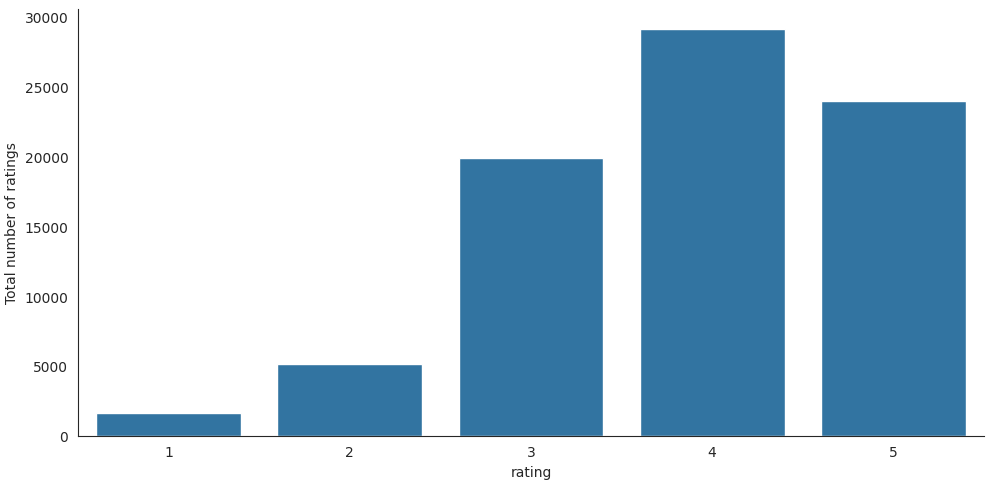

In [8]:
with sns.axes_style('white'):
    g = sns.catplot(data=book_ratings, x="rating", y=None, aspect=2.0, kind='count')
    g.set_ylabels("Total number of ratings")
print (f'Average rating in dataset: {np.mean(book_ratings["rating"])}')

That's enough spelunking through our data. Let’s go ahead and make a recommendation system.

The first step is generating recommendations using content-based filtering.

## Content-based filtering 

### How it works 

<br></br>

<div align="center" style="width: 800px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Content_filtering.jpg"
     alt="Content-based Filtering"
     style="float: center; padding-bottom=0.5em"
     width=800px/>
A depiction of the decision process used to recommend items within content-based filtering algorithms.  
</div>

In Content-based filtering, we seek to make recommendations based on **how similar an item's properties or features are to those of other items.**

Let's use the image above to help us see how this works. Mpho is an avid reader who has just finished the novel "The Golden Compass". Besides the written contents inside this book (item), it has certain attributes or properties which further describe it - such as the author ("Philip Pullman"), genre ("fantasy"), or target audience ("young adult"). These properties are not unique to this novel, as other books also have authors, genres, target audiences, etc. As such, we can compare the properties of different books with the assumption that books which have properties in common (such as author or genre) are similar to one another. We can further **assume that individuals like similar items**. For our example, this means that Mpho, if using content-based filtering to recommend her next book, would have a book such as "Harry Potter and the Philosopher's Stone" suggested to her over Anne Frank's "The Diary of a Young Girl", as the former novel is far more 'similar' to The Golden Compass.     

So let's see how we would implement a system like this in real life.

### Implementation 

Let's implement a straightforward content filtering-based recommendation algorithm.

To begin, we need to gather the various properties of our items so that we can convert them into meaningful features. Following along from our example above, we're going to use the `tag_name` field for each book as a representation of properties such as genre, time-period, and target audience. We're also going to consider the `authors` field, as individuals often enjoy reading novels written by the same author. 

We start off by creating a new column in our `books` dataframe called `auth_tags`, which contains the above-motivated contents for each item. We additionally create two pandas series objects to help us translate between book titles and indexes of our dataframe.  

In [19]:
train_data, test_data = train_test_split(books, test_size=0.05, random_state=42)
train_data_r, test_data_r = train_test_split(book_ratings, test_size=0.05, random_state=42)

In [10]:
books['auth_tags'] = (pd.Series(books[['authors', 'tag_name']]
                      .fillna('')
                      .values.tolist()).str.join(' '))

# Convenient indexes to map between book titles and indexes of 
# the books dataframe
titles = books['title']
indices = pd.Series(books.index, index=books['title'])

We now need a mechanism to convert these textual features into a format that enables us to compute their relative similarities. This will allow us to translate our string-based collection of tags and authors into numerical vectors (see [here](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) for an overview of this process which is very similar to [count-based vectorization](https://youtu.be/W9VtEVBdgnQ)).

In [11]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,2),
                     min_df=0.0, stop_words='english')

# Produce a feature matrix, where each row corresponds to a book,
# with TF-IDF features as columns 
tf_authTags_matrix = tf.fit_transform(books['tag_name'])

We can now compute the similarity between each vector within our matrix. This is done by making use of the `cosine_similarity` function provided to us by `sklearn`.

In [12]:
cosine_sim_authTags = cosine_similarity(tf_authTags_matrix, 
                                        tf_authTags_matrix)
print (cosine_sim_authTags.shape)

(10000, 10000)


In [13]:
cosine_sim_authTags[:5]

array([[1.        , 0.23560979, 0.28324674, ..., 0.05084198, 0.07947133,
        0.01691533],
       [0.23560979, 1.        , 0.22459026, ..., 0.0530554 , 0.07126569,
        0.02330787],
       [0.28324674, 0.22459026, 1.        , ..., 0.03356699, 0.04251551,
        0.01473002],
       [0.1270975 , 0.17922805, 0.11466086, ..., 0.07377326, 0.07659143,
        0.05353916],
       [0.12639752, 0.16195238, 0.12790219, ..., 0.07104895, 0.09558364,
        0.040346  ]])

The resulting structure is a $10000 \times 10000$ dense similarity matrix $S^I$, where the value of the entry in the $i^{th}$ row and $j^{th}$ column, $S^I_{i,j}$, corresponds to the similarity of books $i$ and $j$ within our dataset.

Using this notation, if $i$ and $j$ are the same number (i.e. all the diagonal entries in $S^I$), then the similarity value is equal to 1 (an item is completely similar to itself).  

#### Top-N recommendations

With our content similarity matrix computed, we're now ready to make some recommendations! Let's begin by generating a top-N list of books similar to the one which we prompt the system with.    

Following along from our earlier algorithmic explanation, we do this by: 

  1. Select an initial item (book) from which to generate recommendations. 
  2. Extract all the similarity values between the initial item and each other item in the similarity matrix.
  3. Sort the resulting values in descending order. 
  4. Select the top N similarity values and return the corresponding item details to the user. This is now our simple top-N list.  
  
We implement this algorithmic process in the function below:

In [14]:
def content_generate_top_N_recommendations(book_title, N=10):
    # Convert the string book title to a numeric index for our 
    # similarity matrix
    b_idx = indices[book_title]
    # Extract all similarity values computed with the reference book title
    sim_scores = list(enumerate(cosine_sim_authTags[b_idx]))
    # Sort the values, keeping a copy of the original index of each value
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Select the top-N values for recommendation
    sim_scores = sim_scores[1:N]
    # Collect indexes 
    book_indices = [i[0] for i in sim_scores]
    # Convert the indexes back into titles 
    return titles.iloc[book_indices]

With our function defined, let's test our simple content-based recommender on some sample book titles:

In [15]:
content_generate_top_N_recommendations("The Hobbit", N=10)

188     The Lord of the Rings (The Lord of the Rings, ...
154            The Two Towers (The Lord of the Rings, #2)
160     The Return of the King (The Lord of the Rings,...
610              The Silmarillion (Middle-Earth Universe)
18      The Fellowship of the Ring (The Lord of the Ri...
4975        Unfinished Tales of NÃºmenor and Middle-Earth
2308                               The Children of HÃºrin
963     J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...
465                             The Hobbit: Graphic Novel
Name: title, dtype: object

In [21]:
content_generate_top_N_recommendations("Romeo and Juliet", N=10)

124                       Hamlet
769                Julius Caesar
352                      Othello
153                      Macbeth
247    A Midsummer Night's Dream
838       The Merchant of Venice
529       Much Ado About Nothing
854                Twelfth Night
386                 The Crucible
Name: title, dtype: object

In [22]:
content_generate_top_N_recommendations("The Diary of a Young Girl", N=10)

86                           Night (The Night Trilogy #1)
178                    Angela's Ashes (Frank McCourt, #1)
512     The Hiding Place: The Triumphant True Story of...
799                                  The Story of My Life
6546                        I Have Lived a Thousand Years
1814    Anne Frank Remembered: The Story of the Woman ...
57                     The Adventures of Huckleberry Finn
89                                          The Outsiders
603                                     Girl, Interrupted
Name: title, dtype: object

Having seen the results of these top-N lists, a couple of observations can be made. 

- First, our recommendations seem to be strongly centred around the author of the reference book. For example,  other works by Tolkien and Shakespeare are highly recommended when using reference searches for "The Hobbit" and "Romeo and Juliet" respectively. This could be a natural result of the fact that an author's name is far less common in the dataset than other textual features such as genre. As such, books which share an author will be regarded as being far more similar.  


 - Second, in cases where the reference author has not written multiple book titles, such as Anne Frank (The Diary of a Young Girl), the recommendations produced are more varied and cover multiple titles in the same or similar genres. 

 
Based on these observations, we can ask if, in fact, the recommendations for "The Hobbit" and "Romeo and Juliet" are actually any good. After all, a reader who knows of Tolkien and Shakespeare will often already know of other books these authors have written as well. This is where some of the subjective metrics introduced earlier (such as diversity), can be used to penalize these recommendations and help discover better ones. 

---
Seeing that we were able to produce more varied recommendations when the author didn't write multiple titles, try to alter the above code cells to calculate similarity only using the `tag_name` field.

How does this alteration affect the recommendations produced?


---
#### Rating Prediction

As motivated previously, in some cases, we may wish to calculate directly what rating a user _would_ give a book that they haven't read yet.

We can modify our content-based filtering algorithm to do this in the following manner: 

   1. Select a reference user from the database and a reference item (book) they have _not_ rated. 
   2. For the user, gather the similarity values between the reference item and each item the user _has_ rated. 
   3. Sort the gathered similarity values in descending order. 
   4. Select the $k$ highest similarity values, which are above a given threshold value, creating a collection $K$. 
   5. Compute a weighted average rating from these values, which is the sum of the similarity values of each item multiplied by its assigned user rating, divided by the sum of the similarity values. This can be expressed in the formula as:
   
   $$ \hat{R}_{ju} = \frac{\sum_{i \in K} s_{ij} \times r_{iu}}{\sum_{i \in K} s_{ij}}   $$
   
   where $\hat{R}_{ju}$ is the weighted average computed for the reference item $j$ and reference user $u$, $K$ is the collection of items, $s_{ij}$ is the similarity computed between items $i$ and $j$, and $r_{iu}$ is the known rating user $u$ has given item $i$.
   6. We return the weighted average $\hat{R}_{ju}$ as the prediction for our reference item.
   
   
We implement this algorithmic process in the function below:

In [16]:
def content_generate_rating_estimate(book_title, user, rating_data, k=20, threshold=0.0):
    # Convert the book title to a numeric index for our similarity matrix
    b_idx = indices[book_title]
    neighbors = [] # <-- Stores our collection of similarity values 
     
    # Gather the similarity ratings between each book the user has rated
    # and the reference book 
    for index, row in rating_data[rating_data['user_id']==user].iterrows():
        sim = cosine_sim_authTags[b_idx-1, indices[row['title']]-1]
        neighbors.append((sim, row['rating']))
    # Select the top-N values from our collection
    k_neighbors = heapq.nlargest(k, neighbors, key=lambda t: t[0])

    # Compute the weighted average using similarity scores and 
    # user item ratings. 
    simTotal, weightedSum = 0, 0
    for (simScore, rating) in k_neighbors:
        # Ensure that similarity ratings are above a given threshold
        if (simScore > threshold):
            simTotal += simScore
            weightedSum += simScore * rating
    try:
        predictedRating = weightedSum / simTotal
    except ZeroDivisionError:
        # Cold-start problem - No ratings given by user. 
        # We use the average rating for the reference item as a proxy in this case 
        predictedRating = np.mean(rating_data[rating_data['title']==book_title]['rating'])
    return predictedRating

In [39]:
import heapq

def content_generate_rating_estimate(title, user, rating_data, k=20, threshold=0.0):
    # This is a simplified version of what your function might look like.
    # You need to ensure that 'similarity_score' and 'rating' are scalar values.
    
    neighbors = []
    
    for index, row in rating_data.iterrows():
        if row['user_id'] == user:
            continue
        # Compute the similarity score between the given 'title' and 'row['title']'
        similarity_score = compute_similarity(title, row['title'])  # Ensure this returns a scalar
        if similarity_score > threshold:
            neighbors.append((similarity_score, row['rating']))
    
    # Add debug statements to inspect neighbors
    # print(f"Neighbors before heapq.nlargest: {neighbors}")
    
    # Select the top-N values from our collection
    k_neighbors = heapq.nlargest(k, neighbors, key=lambda t: t[0])
    
    # Compute the weighted average using similarity scores and user item ratings. 
    simTotal, weightedSum = 0, 0
    for sim, rating in k_neighbors:
        simTotal += sim
        weightedSum += sim * rating
    
    # Prevent division by zero
    if simTotal == 0:
        return 0
    
    return weightedSum / simTotal

def compute_similarity(title1, title2):
    # Dummy similarity computation for illustration.
    # Replace with your actual similarity computation logic.
    return 1.0 if title1 == title2 else 0.0

In [44]:
test_users = test_data_r['user_id'][:3]
test_titles = test_data_r['book_id'][:3]

ratings = []
books = []

for user in test_users:
    for title in test_titles:
        rat = content_generate_rating_estimate(title, user, rating_data=book_ratings, k=20, threshold=0.0)
        ratings.append(rat)
        books.append(title)

print(ratings)
print(books)

[0, 0, 0, 0, 0, 0, 0, 0, 0]
[7354, 98, 4979, 7354, 98, 4979, 7354, 98, 4979]


In [52]:
# Generating predictions
predictions = []
actual_ratings = []


for index, row in test_data_r.iterrows():
    user = row['user_id']
    title = row['title']
    actual_rating = row['rating']
    
    predicted_rating = content_generate_rating_estimate(title, user, train_data_r, k=20, threshold=0.0)
    
    if not np.isnan(predicted_rating):
        predictions.append(predicted_rating)
        actual_ratings.append(actual_rating)

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(actual_ratings, predictions))
print(f"RMSE: {rmse}")
mae = mean_absolute_error(actual_ratings, predictions)
print(f"MAE: {mae}")

KeyboardInterrupt: 

With our algorithm defined, let's quickly test it out to see some results. 

To help us get a sense of the relevance and accuracy of these ratings, we select a lucky user (number 314) and consider their historical data: 

In [17]:
# Subset of ratings from user 314
book_ratings[book_ratings['user_id'] == 314][3:10]

,user_id,book_id,title,rating
401,314,6,Harry Potter and the Goblet of Fire (Harry Pot...,5
1500,314,29,The Mother Tongue: English and How It Got That...,3
1600,314,30,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,4
1900,314,36,The Lord of the Rings: Weapons and Warfare,4
2300,314,98,What to Expect the First Year (What to Expect),3
2400,314,105,Chapterhouse: Dune (Dune Chronicles #6),3
2501,314,106,Dune Messiah (Dune Chronicles #2),4


We first generate some ratings for books which user 314 has already rated:

In [18]:
title = "The Lord of the Rings: Weapons and Warfare"
actual_rating = book_ratings[(book_ratings['user_id'] == 314) & (book_ratings['title'] == title)]['rating'].values[0]
pred_rating = content_generate_rating_estimate(book_title=title, user=314, rating_data=book_ratings)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t {actual_rating}")
print (f"Predicted rating: \t {pred_rating}")

Title - The Lord of the Rings: Weapons and Warfare
---
Actual rating: 		 4
Predicted rating: 	 3.8200585934663667


In [26]:
title = "Survival in Auschwitz"
actual_rating = book_ratings[(book_ratings['user_id'] == 314) & (book_ratings['title'] == title)]['rating'].values[0]
pred_rating = content_generate_rating_estimate(book_title=title, user=314, rating_data=book_ratings)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t {actual_rating}")
print (f"Predicted rating: \t {pred_rating}")

Title - Survival in Auschwitz
---
Actual rating: 		 2
Predicted rating: 	 2.8246814748278624


We repeat this process, but now for similar titles which have not been rated:  

In [27]:
title = "The Hobbit"
pred_rating = content_generate_rating_estimate(book_title=title, user=314, rating_data=book_ratings)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t ?")
print (f"Predicted rating: \t {pred_rating}")

Title - The Hobbit
---
Actual rating: 		 ?
Predicted rating: 	 3.5715015277712188


In [28]:
title = "Dune (Dune Chronicles #1)"
pred_rating = content_generate_rating_estimate(book_title=title, user=314, rating_data=book_ratings)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t ?")
print (f"Predicted rating: \t {pred_rating}")

Title - Dune (Dune Chronicles #1)
---
Actual rating: 		 ?
Predicted rating: 	 3.764917447911706


Based on the above results, our content-based ratings seem to be pretty good - being out by less than 1 rating point per known prediction! While we can't make the same judgement for the predicted ratings of the unseen books, they are close to known book ratings which are similar in nature, which is a promising sign.

## Conclusion

We covered a lot of ground in this train by identifying the building blocks of recommender systems: items (things) and users (people). We've learned how recommender algorithms fundamentally use similarity to compare these items and users, with item-item similarity represented by the content-based filtering method. We went on to review the content-based filtering method both theoretically and practically through code implementation.

## Appendix
Links to additional resources to help with the understanding of concepts presented in the train:

- [Intro to Recommender Systems](https://www.youtube.com/watch?v=Eeg1DEeWUjA&feature=youtu.be)
- [Advanced Recommender System Metrics](https://wiki.epfl.ch/edicpublic/documents/Candidacy%20exam/Evaluation.pdf)